# Imports
Python packages.

In [138]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [139]:
FIGSIZE = (10,8)

In [140]:
plt.style.use("ggplot")

## Single Variable Gradient Descent
Minimises the function by walking in the direction of negative gradients with a step size relative to the learning rate.

In [141]:
function = lambda x: x**3 + 3*x**2 -1
derivative = lambda x: 3*x**2 + 6*x

In [142]:
min = -30
max = 20
granularity=20

X = [x / 10.0 for x in range(min, max, 1)]
Y = [function(x) for x in X]

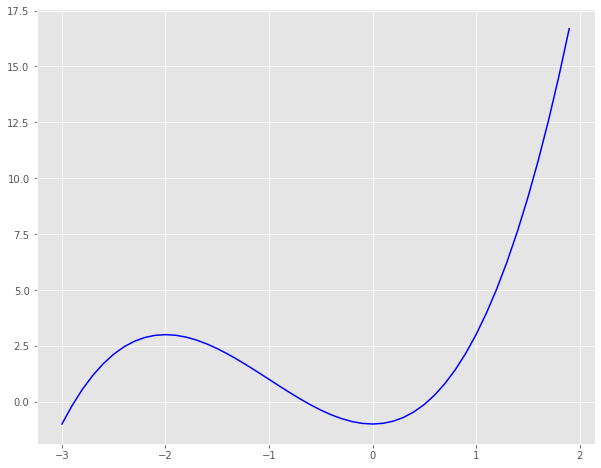

In [143]:
plt.figure(figsize = FIGSIZE)
plt.plot(X, Y, c='b')
plt.show()

In [144]:
threshold = 0.0001

In [145]:
def gradient_descent(x: float, learning_rate: float):
  values = []
  derivs = []

  for i in range(100):
    deriv = derivative(x)

    if threshold < abs(deriv):
      x += - learning_rate * deriv
      values.append(x)
      derivs.append(deriv)
    
    else:
      break
  
  return values, derivs

In [146]:
x = 2.0
learning_rate = 0.01

values, derivs = gradient_descent(x, learning_rate)

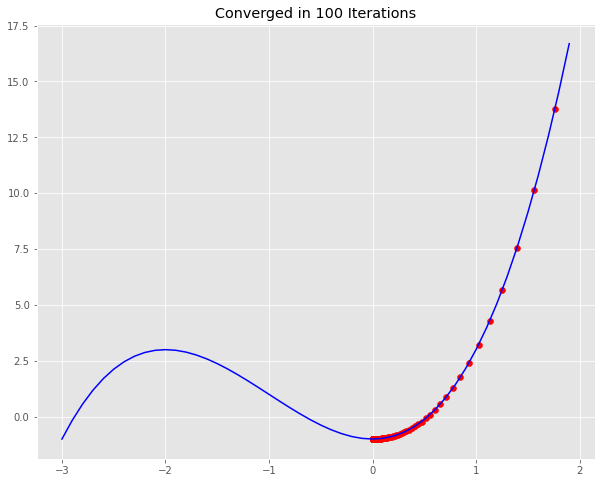

In [147]:
plt.figure(figsize = FIGSIZE)
plt.plot(X, Y, c='b')
plt.scatter(values, [function(val) for val in values], c='r')
plt.title(f"Converged in {len(values)} Iterations")
plt.show()

# Multiple Variable Gradient Descent
Now, with mutiple variables we must consider the partial derivative case of each variable's gradient w.r.t. the function we want to minimise.

In [148]:
function = lambda x, y: 2*x**2 + y**2 + 4
derivative_x = lambda x: 4*x
derivative_y = lambda y: 2*y

In [149]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = function(x,y)

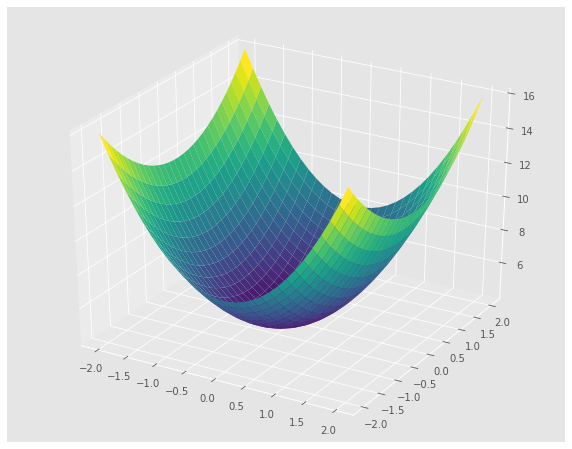

In [150]:
fig = plt.figure(figsize = FIGSIZE)
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis')
plt.show()

In [157]:
def multi_gradient_descent(x: float, y: float, learning_rate: float):
  values = []
  derivs = []

  for i in range(100):
    deriv_x = derivative_x(x)
    deriv_y = derivative_y(x)

    if threshold < function(x, y):
      x += - learning_rate * deriv_x
      y += - learning_rate * deriv_y

      values.append((x,y))
      derivs.append((deriv_x, deriv_y))
    
    else:
      break
  
  return values, derivs

In [162]:
x = y = 4
learning_rate = 0.001

values, derivs = multi_gradient_descent(x, y, learning_rate)

In [163]:
first = values[0]
last = values[-1]

print(f"Converged in {len(values)} Iterations from {first} to {(round(last[0], 2), round(last[1], 2))}")

Converged in 1000 Iterations from (3.984, 3.992) to (0.07, 2.04)
